In [100]:
import tensorflow.keras as keras
import tensorflow as tf

In [101]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
class_name = {0: 'airplane', 1: 'airplane', 2: 'airplane', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

Text(0.5, 0, "This is frog's Image.")

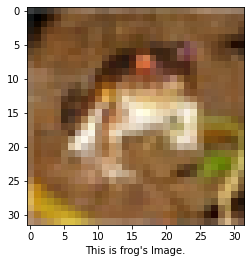

In [102]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.xlabel("This is {0}'s Image.".format(class_name[y_train[0][0]]))

In [103]:
print(x_train[0].shape)
y_train

print('x_train.shape = {0}'.format(x_train.shape))
print('y_train.shape = {0}'.format(y_train.shape))
print(y_train)

(32, 32, 3)
x_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [104]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [105]:
model.compile(
    optimizer= keras.optimizers.Adam(),
    loss= keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction='auto', name='sparse_categorical_crossentropy'),
    metrics= ['accuracy']
)

In [106]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 128)         32896     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

In [107]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 13s 14ms/step - loss: 2.0773 - accuracy: 0.4306
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.2148 - accuracy: 0.5693
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0453 - accuracy: 0.6320
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9319 - accuracy: 0.6765
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.8368 - accuracy: 0.7058
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.7640 - accuracy: 0.7322
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6858 - accuracy: 0.7591
Epoch 8/10
782/782 [==============================] - 12s 15ms/step - loss: 0.6216 - accuracy: 0.7833
Epoch 9/10
782/782 [==============================] - 12s 15ms/step - loss: 0.5602 - accuracy: 0.8034
Epoch 10/10
782/782 [==============================] - 12s 15ms/step - loss: 0.498

In [108]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 1.0697 - accuracy: 0.6867


[1.069652795791626, 0.6866999864578247]

In [21]:
y_pred = model.predict(x_test)

In [26]:
import numpy as np

print(np.argmax(y_pred[1]))

8


Text(0.5, 0, "This is ship's Image. And prediction says this is ship")

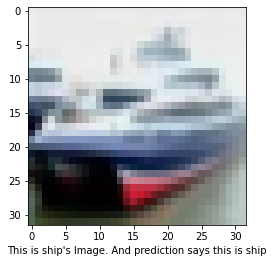

In [86]:
plt.imshow(x_test[1])
plt.xlabel("This is {0}'s Image. And prediction says this is {1}".format(class_name[y_test[1][0]], class_name[np.argmax(y_pred[1])]))